In [266]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [267]:
# импорт данных из SQL, общая таблица и сгруппированная по рейсам
data = pd.read_csv("D:\SkillFactorylearningapps\query.csv")
grouped = pd.read_csv("D:\SkillFactorylearningapps\grouped.csv")

In [268]:
# проверка а нулевые значения
data.info()
# видно, что данные из таблицы flightamount пришли нулевые значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12004 entries, 0 to 12003
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            12004 non-null  int64  
 1   seat_no              11995 non-null  object 
 2   ticket_no            11995 non-null  float64
 3   fare_conditions      11995 non-null  object 
 4   flightamount         11995 non-null  float64
 5   countseats           12004 non-null  int64  
 6   scheduled_departure  12004 non-null  object 
 7   actual_departure     12004 non-null  object 
 8   departure_airport    12004 non-null  object 
 9   scheduled_arrival    12004 non-null  object 
 10  actual_arrival       12004 non-null  object 
 11  arrival_airport      12004 non-null  object 
 12  flighttime           12004 non-null  object 
 13  status               12004 non-null  object 
 14  aircraft_code        12004 non-null  object 
 15  model                12004 non-null 

In [269]:
# проверяем то же самое на сгруппированных данных, и видим что из-за этого не можем посчитать flight_revenue
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            127 non-null    int64  
 1   seats_taken          127 non-null    int64  
 2   flight_revenue       118 non-null    float64
 3   countseats           127 non-null    int64  
 4   occupancy            127 non-null    float64
 5   scheduled_departure  127 non-null    object 
 6   actual_departure     127 non-null    object 
 7   departure_airport    127 non-null    object 
 8   scheduled_arrival    127 non-null    object 
 9   actual_arrival       127 non-null    object 
 10  arrival_airport      127 non-null    object 
 11  flighttime           127 non-null    object 
 12  status               127 non-null    object 
 13  aircraft_code        127 non-null    object 
 14  model                127 non-null    object 
dtypes: float64(2), int64(3), object(10)
memo

In [270]:
# выкидываем 9 рейсов, можно сохранить их для дальнейшей передачи сотрудникам для проверки почему информация 
# о доходах с этих рейсов не попала в таблицу 
data1 = data.dropna()
grouped1 = grouped.dropna()

In [302]:
# 9 рейсов на которые нужно собрать информацию 
nodata = grouped[grouped.flight_revenue.isnull()]
nodata["flight_id"]

59    136511
60    136513
61    136514
62    136523
63    136540
64    136544
65    136546
66    136560
67    136567
Name: flight_id, dtype: int64

In [272]:
# проверка оставшихся рейсов 
grouped1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            118 non-null    int64  
 1   seats_taken          118 non-null    int64  
 2   flight_revenue       118 non-null    float64
 3   countseats           118 non-null    int64  
 4   occupancy            118 non-null    float64
 5   scheduled_departure  118 non-null    object 
 6   actual_departure     118 non-null    object 
 7   departure_airport    118 non-null    object 
 8   scheduled_arrival    118 non-null    object 
 9   actual_arrival       118 non-null    object 
 10  arrival_airport      118 non-null    object 
 11  flighttime           118 non-null    object 
 12  status               118 non-null    object 
 13  aircraft_code        118 non-null    object 
 14  model                118 non-null    object 
dtypes: float64(2), int64(3), object(10)
memo

In [273]:
# проверяем на корреляцию и статистические значения показатели таблицы
# видим что у дохода с рейса очень высокая коореляция с занятыми местами
print(grouped1.corr())
grouped1.describe()

                flight_id  seats_taken  flight_revenue  countseats  occupancy
flight_id        1.000000    -0.705965       -0.872855   -0.900023   0.353648
seats_taken     -0.705965     1.000000        0.907523    0.805490   0.250458
flight_revenue  -0.872855     0.907523        1.000000    0.976290  -0.177192
countseats      -0.900023     0.805490        0.976290    1.000000  -0.366368
occupancy        0.353648     0.250458       -0.177192   -0.366368   1.000000


,flight_id,seats_taken,flight_revenue,countseats,occupancy
count,118.000000,118.000000,1.180000e+02,118.000000,118.000000
mean,136533.440678,101.652542,1.176506e+06,113.500000,0.899950
std,261.971994,14.295643,4.794251e+05,16.570363,0.081705
min,136119.000000,64.000000,5.310000e+05,97.000000,0.659794
25%,136286.250000,95.000000,7.464000e+05,97.000000,0.835052
50%,136528.500000,97.000000,1.081650e+06,113.500000,0.898454
75%,136768.500000,111.750000,1.625850e+06,130.000000,0.989691
max,136956.000000,130.000000,1.886000e+06,130.000000,1.000000


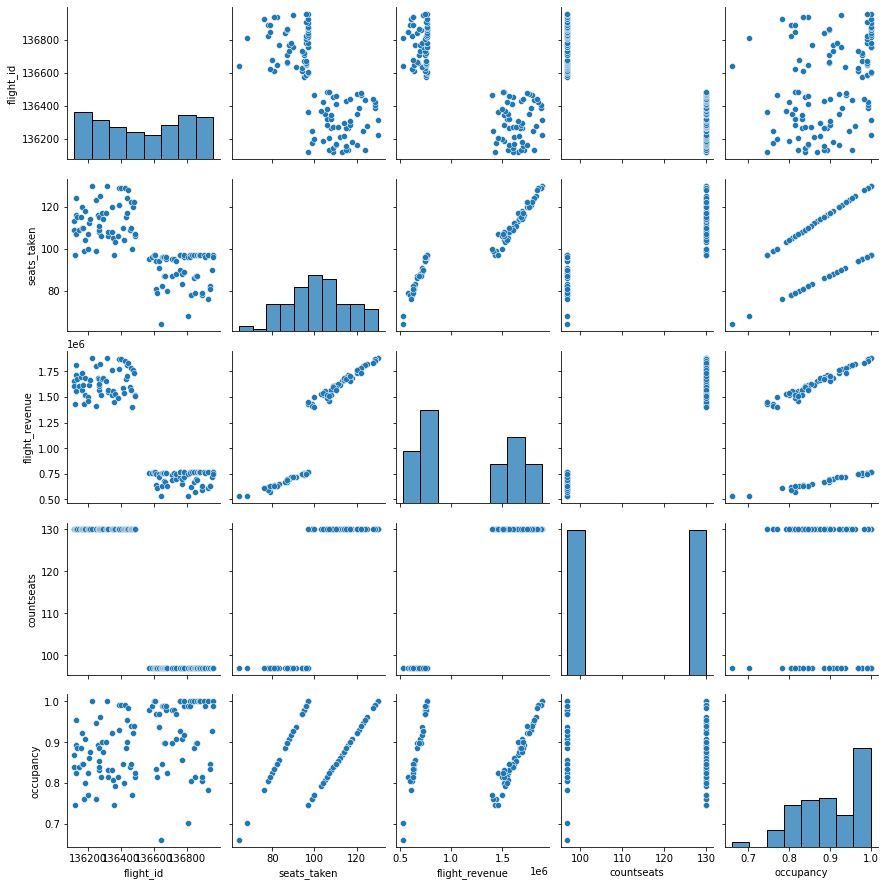

In [274]:
# проверяем на графике
sns.pairplot(grouped1)

(0.915, 1.0]      53
(0.83, 0.915]     39
(0.745, 0.83]     24
(0.658, 0.745]     2
Name: occupancy, dtype: int64


<AxesSubplot:title={'center':'Заполняемость самолетов'}, ylabel='Frequency'>

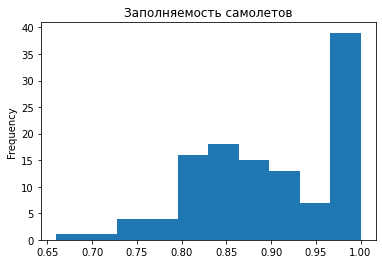

In [304]:
# смотрим гисторамму заполняемости, видим что чуть меньше 40 самолетов (~34%) заполняются полностью,
# но есть ряд рейсов чья заполняемость меньше нижнего кванитиля
print(grouped1['occupancy'].value_counts(bins = 4))
grouped1['occupancy'].plot(kind = 'hist', title = 'Заполняемость самолетов')

<AxesSubplot:title={'center':'Доходность рейса'}, ylabel='Frequency'>

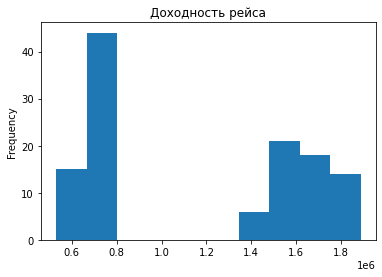

In [276]:
# смотрим гистограмму доходов с рейса, видим, что они распределены на 2 группы, надо проверить почему 
grouped1['flight_revenue'].plot(kind = 'hist', title = 'Доходность рейса')

In [277]:
# удаляем выбросы по occupancy, оставляем 75% рейсов, это заполняемость больше 83.5%
perc25 = grouped1.occupancy.quantile(0.25)
perc75 = grouped1.occupancy.quantile(0.75)
IQR = grouped1.occupancy.quantile(0.75) - grouped1.occupancy.quantile(0.25)
grouped1_IQR = grouped1[grouped1.occupancy > perc25]
grouped1_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            87 non-null     int64  
 1   seats_taken          87 non-null     int64  
 2   flight_revenue       87 non-null     float64
 3   countseats           87 non-null     int64  
 4   occupancy            87 non-null     float64
 5   scheduled_departure  87 non-null     object 
 6   actual_departure     87 non-null     object 
 7   departure_airport    87 non-null     object 
 8   scheduled_arrival    87 non-null     object 
 9   actual_arrival       87 non-null     object 
 10  arrival_airport      87 non-null     object 
 11  flighttime           87 non-null     object 
 12  status               87 non-null     object 
 13  aircraft_code        87 non-null     object 
 14  model                87 non-null     object 
dtypes: float64(2), int64(3), object(10)
memor

In [278]:
# создаем список из 31 рейса рекомендованного к удалению
remove_revenue = grouped1[grouped1.occupancy <= perc25]

In [279]:
# смотрим отношение дохода на одно занятое место и проверяем какие рейсы давали лучший доход с одного пассажира
grouped1["revenue_per_passanger"] = grouped1["flight_revenue"]/grouped1["seats_taken"]
# рзбиваем результаты на 4 группы
grouped1['revenue_per_passanger'].value_counts(bins = 5)

<ipython-input-279-7bb85d6d871d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped1["revenue_per_passanger"] = grouped1["flight_revenue"]/grouped1["seats_taken"]


(7272.021, 8824.622]      59
(13459.248, 15004.124]    59
(8824.622, 10369.498]      0
(10369.498, 11914.373]     0
(11914.373, 13459.248]     0
Name: revenue_per_passanger, dtype: int64

<AxesSubplot:>

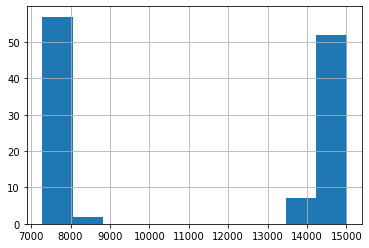

In [280]:
# смотрим по графику распределение, он визуально подтвержает, что есть четкое разделение на 2 группы, что подтверждает 
# предыдущий график
grouped1['revenue_per_passanger'].hist()

In [306]:
# выбираем 59 рейсов с малым доходом на пассажира как рекомендательные к доп анализу
lowerrate = grouped1[grouped1.revenue_per_passanger <= 8824.622]

In [282]:
# дополнительно группируем по времени в пути, что рейсы занимали меньше часа 
lowerrate.groupby(["flighttime"])["flight_id"].count()

flighttime
0 years 0 mons 0 days 0 hours 49 mins 0.00 secs    10
0 years 0 mons 0 days 0 hours 50 mins 0.00 secs    34
0 years 0 mons 0 days 0 hours 51 mins 0.00 secs    15
Name: flight_id, dtype: int64

In [309]:
# выбираем 59 рейсов с бОльшим доходом на пассажира и видим, что они выигрывают за счет вместимости
higherrate = grouped1[grouped1.revenue_per_passanger >= 13459.248]
higherrate

,flight_id,seats_taken,flight_revenue,countseats,occupancy,scheduled_departure,actual_departure,departure_airport,scheduled_arrival,actual_arrival,arrival_airport,flighttime,status,aircraft_code,model,revenue_per_passanger
0,136119,113,1653000.0,130,0.869231,2017-01-03T10:05:00Z,2017-01-03T10:08:00Z,AAQ,2017-01-03T11:45:00Z,2017-01-03T11:49:00Z,SVO,0 years 0 mons 0 days 1 hours 41 mins 0.00 secs,Arrived,733,Boeing 737-300,14628.318584
1,136120,109,1605400.0,130,0.838462,2017-02-24T10:05:00Z,2017-02-24T10:07:00Z,AAQ,2017-02-24T11:45:00Z,2017-02-24T11:46:00Z,SVO,0 years 0 mons 0 days 1 hours 39 mins 0.00 secs,Arrived,733,Boeing 737-300,14728.440367
2,136122,97,1431000.0,130,0.746154,2017-01-08T10:05:00Z,2017-01-08T10:08:00Z,AAQ,2017-01-08T11:45:00Z,2017-01-08T11:48:00Z,SVO,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Arrived,733,Boeing 737-300,14752.577320
3,136130,107,1556600.0,130,0.823077,2017-02-13T10:05:00Z,2017-02-13T10:07:00Z,AAQ,2017-02-13T11:45:00Z,2017-02-13T11:46:00Z,SVO,0 years 0 mons 0 days 1 hours 39 mins 0.00 secs,Arrived,733,Boeing 737-300,14547.663551
4,136131,124,1812800.0,130,0.953846,2017-01-28T10:05:00Z,2017-01-28T10:07:00Z,AAQ,2017-01-28T11:45:00Z,2017-01-28T11:46:00Z,SVO,0 years 0 mons 0 days 1 hours 39 mins 0.00 secs,Arrived,733,Boeing 737-300,14619.354839
5,136132,116,1714000.0,130,0.892308,2017-02-15T10:05:00Z,2017-02-15T10:09:00Z,AAQ,2017-02-15T11:45:00Z,2017-02-15T11:48:00Z,SVO,0 years 0 mons 0 days 1 hours 39 mins 0.00 secs,Arrived,733,Boeing 737-300,14775.862069
6,136135,115,1678600.0,130,0.884615,2017-02-01T10:05:00Z,2017-02-01T10:08:00Z,AAQ,2017-02-01T11:45:00Z,2017-02-01T11:48:00Z,SVO,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Arrived,733,Boeing 737-300,14596.521739
7,136146,109,1604200.0,130,0.838462,2017-02-09T10:05:00Z,2017-02-09T10:08:00Z,AAQ,2017-02-09T11:45:00Z,2017-02-09T11:48:00Z,SVO,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Arrived,733,Boeing 737-300,14717.431193
8,136159,115,1700600.0,130,0.884615,2017-01-04T10:05:00Z,2017-01-04T10:07:00Z,AAQ,2017-01-04T11:45:00Z,2017-01-04T11:45:00Z,SVO,0 years 0 mons 0 days 1 hours 38 mins 0.00 secs,Arrived,733,Boeing 737-300,14787.826087
9,136164,120,1738400.0,130,0.923077,2017-01-07T10:05:00Z,2017-01-07T10:07:00Z,AAQ,2017-01-07T11:45:00Z,2017-01-07T11:46:00Z,SVO,0 years 0 mons 0 days 1 hours 39 mins 0.00 secs,Arrived,733,Boeing 737-300,14486.666667


In [308]:
# дополнительно группируем по времени в пути, что рейсы занимали в среднем 1 час 40 минут 
higherrate.groupby(["flighttime"])["flight_id"].count()

flighttime
0 years 0 mons 0 days 1 hours 38 mins 0.00 secs     4
0 years 0 mons 0 days 1 hours 39 mins 0.00 secs    17
0 years 0 mons 0 days 1 hours 40 mins 0.00 secs    27
0 years 0 mons 0 days 1 hours 41 mins 0.00 secs     8
0 years 0 mons 0 days 1 hours 42 mins 0.00 secs     2
0 years 0 mons 0 days 1 hours 43 mins 0.00 secs     1
Name: flight_id, dtype: int64

In [285]:
# дополнительно посмотрим разброс по fare_conditions и его влиянию на доход
data_fcon = data1.groupby(['flight_id','fare_conditions']).count().reset_index()

In [286]:
# убираем ненужные столбцы и объединяем с данными по общему количеству мест
dfc = data_fcon[["flight_id","fare_conditions","countseats"]]
dts = grouped[["flight_id","countseats"]]
joined = dfc.merge(dts, on = "flight_id")
joined["percents"] = joined["countseats_x"]/joined["countseats_y"]
joined

,flight_id,fare_conditions,countseats_x,countseats_y,percents
0,136119,Business,11,130,0.084615
1,136119,Economy,102,130,0.784615
2,136120,Business,11,130,0.084615
3,136120,Economy,98,130,0.753846
4,136122,Business,10,130,0.076923
...,...,...,...,...,...
231,136951,Economy,78,97,0.804124
232,136953,Business,12,97,0.123711
233,136953,Economy,85,97,0.876289
234,136956,Business,11,97,0.113402


In [287]:
# выделяем отдельно бизнес класс и проверяем здесь на заполняемость
business = joined[joined.fare_conditions == "Business"]
business.describe()

,flight_id,countseats_x,countseats_y,percents
count,118.000000,118.000000,118.000000,118.000000
mean,136533.440678,10.788136,113.500000,0.097468
std,261.971994,1.395057,16.570363,0.020787
min,136119.000000,6.000000,97.000000,0.046154
25%,136286.250000,10.000000,97.000000,0.084615
50%,136528.500000,11.000000,113.500000,0.092308
75%,136768.500000,12.000000,130.000000,0.123711
max,136956.000000,12.000000,130.000000,0.123711


(0.108, 0.124]      42
(0.0772, 0.0927]    38
(0.0617, 0.0772]    18
(0.0927, 0.108]     14
(0.0451, 0.0617]     6
Name: percents, dtype: int64


<AxesSubplot:>

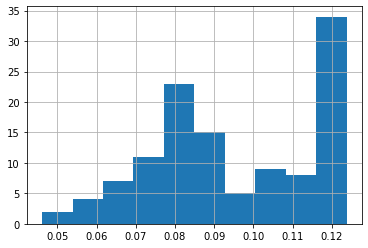

In [288]:
# смотрим распределение и видим, что большая часть в районе 6 - 12.5 процентов
print(business['percents'].value_counts(bins = 5))
business['percents'].hist()

In [312]:
# выбираем 75% лучших рейсов, остальные перенесим в рекомендованные к удалению
remove_business = business[business.percents <= business.percents.quantile(0.25)]

In [290]:
# выделяем отдельно эконом класс и проверяем здесь на заполняемость
economy = joined[joined.fare_conditions == "Economy"]
economy.describe()

,flight_id,countseats_x,countseats_y,percents
count,118.000000,118.000000,118.000000,118.000000
mean,136533.440678,90.864407,113.500000,0.802483
std,261.971994,14.028003,16.570363,0.068905
min,136119.000000,54.000000,97.000000,0.556701
25%,136286.250000,83.000000,97.000000,0.753846
50%,136528.500000,85.500000,113.500000,0.800000
75%,136768.500000,101.750000,130.000000,0.865979
max,136956.000000,118.000000,130.000000,0.907692


(0.837, 0.908]    47
(0.767, 0.837]    34
(0.697, 0.767]    30
(0.627, 0.697]     5
(0.555, 0.627]     2
Name: percents, dtype: int64


<AxesSubplot:>

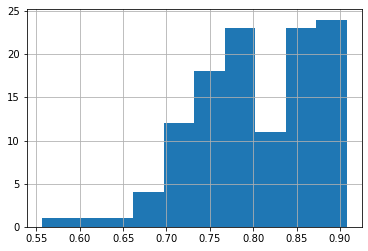

In [291]:
# смотрим распределение и видим, что большая часть в районе 69.7 - 90.8 процентов
print(economy['percents'].value_counts(bins = 5))
economy['percents'].hist()

In [314]:
# выбираем 75% лучших рейсов, остальные перенесим в рекомендованные к удалению
remove_economy = economy[economy.percents <= economy.percents.quantile(0.25)]

In [293]:
# объединяем все рекоммендованные к удалению рейсы, оставляем те которые есть во всех 3 таблицах
remove = remove_revenue.merge(remove_business, on = "flight_id", how = "inner").merge(remove_economy, on = "flight_id", how = "inner")

In [315]:
# выводим на экран 20 рейсов на 100% закрытие
remove

0     136122
1     136130
2     136178
3     136185
4     136202
5     136250
6     136266
7     136282
8     136320
9     136322
10    136351
11    136360
12    136366
13    136383
14    136420
15    136464
16    136485
17    136807
18    136844
19    136887
Name: flight_id, dtype: int64

In [317]:
# еще 11 рейсов на рассмотрение
check = remove.merge(remove_revenue,on="flight_id",how="right", indicator = True)
check = check[check["_merge"] == "right_only"].dropna(axis = 1)
check["flight_id"]

5     136204
11    136345
19    136486
20    136609
21    136620
22    136642
23    136678
25    136823
28    136888
29    136922
30    136937
Name: flight_id, dtype: int64